<a href="https://colab.research.google.com/github/chloed77/MT412---E-Portfolio---Chloe-Downes/blob/main/EF308_Group_Assignment_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Import visualisation packages

import matplotlib.pyplot as plt
import plotly.express as px

# import statistics package

import statsmodels.api as sm
import statsmodels.tsa.api as smt   # new
import statsmodels.tsa.stattools as st

import scipy.stats as stats

# **Import Dataset**

In [ ]:
creditdata = pd.read_csv('BankChurners.csv')
creditdata

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Information from Dataset**

In [ ]:
creditdata.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# *Data Cleaning*

# **Check for Null Values**

In [ ]:
# Handling missing / NaN Values

(creditdata.isna().sum(axis=0))
print(creditdata.isna().sum(axis=0)/len(creditdata))

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

Shows no null values in dataset

# **Check for Duplicates**

In [ ]:
# Check for duplicates
duplicate_rows = creditdata[creditdata.duplicated()]

# Print duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2]
Index: []

[0 rows x 23 columns]


In [ ]:
print("There are " + str(creditdata.duplicated().sum()) + " duplicated rows")

There are 0 duplicated rows


Illustrates no duplicates in our dataset

# **Checking Distribution of Data**

In [ ]:
mean = creditdata.mean()
print ('Mean:')
print(mean)

mode = creditdata.mode()
print ('\nMode:')
print (mode)

median = creditdata.median()
print ('\nMedian:')
print(median)

Mean:
CLIENTNUM                                                                                                                             7.391776e+08
Attrition_Flag                                                                                                                        1.606596e-01
Customer_Age                                                                                                                          4.632596e+01
Gender                                                                                                                                5.290807e-01
Dependent_count                                                                                                                       2.346203e+00
Education_Level                                                                                                                       1.974622e+00
Marital_Status                                                                                                  

In [ ]:
# Investigate Distribution

# Calculate skewness for all columns
skewness = creditdata.skew()
print ('Skewness:')
print(skewness)

# Calculate kurtosis for all columns
kurtosis = creditdata.kurtosis()
print ('\nKurtosis:')
print(kurtosis)

Skewness:
CLIENTNUM                                                                                                                             0.995601
Attrition_Flag                                                                                                                        1.848449
Customer_Age                                                                                                                         -0.033605
Gender                                                                                                                               -0.116537
Dependent_count                                                                                                                      -0.020826
Education_Level                                                                                                                       0.735743
Marital_Status                                                                                                                      

In [ ]:
fig = px.histogram(creditdata, x="Total_Trans_Amt")
fig.show()

In [ ]:
# Variance

creditdata['Credit_Limit'].var()

82605860.99764162

In [ ]:
# Plotting distributions to see if there is actually positive skewness and low kurtosis

fig = px.histogram(creditdata, x="Credit_Limit")
fig.show()

We notice the data is not normally distributed based on the summary statistics from the mean, median, mode, standard deviation, skewness, and kurtosis.

We further illustrate this using the Shapiro test from the SciPy library (scipy.stats.shapiro) to check for normality.

In [ ]:
# Statistical Test

shapiro_test_stat, shapiro_p_value = stats.shapiro(creditdata)
print(f'Shapiro-Wilk Test - Test Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}')

# Interpret the result
if shapiro_p_value > 0.05:
    print("The data may be approximately normally distributed.")
else:
    print("The data may not be normally distributed.")

Shapiro-Wilk Test - Test Statistic: 0.4254326820373535, p-value: 0.0
The data may not be normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Due to large data set - the test was run on the head and tail sample of the dataset

Results shows the data is not normally distributed

In [ ]:
# Statistical Test
# Check distribution of data

shapiro_test_stat, shapiro_p_value = stats.shapiro(creditdata.head())
print(f'Shapiro-Wilk Test - Test Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}')

# Interpret the result
if shapiro_p_value > 0.05:
    print("The data may be approximately normally distributed.")
else:
    print("The data may not be normally distributed.")

Shapiro-Wilk Test - Test Statistic: 0.20834064483642578, p-value: 3.792890690174683e-22
The data may not be normally distributed.


In [ ]:
# Statistical Test
# Check distribution of data

shapiro_test_stat, shapiro_p_value = stats.shapiro(creditdata.tail())
print(f'Shapiro-Wilk Test - Test Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}')

# Interpret the result
if shapiro_p_value > 0.05:
    print("The data may be approximately normally distributed.")
else:
    print("The data may not be normally distributed.")

Shapiro-Wilk Test - Test Statistic: 0.2072911262512207, p-value: 3.6853998721405436e-22
The data may not be normally distributed.


# **Identifying Outliers**

### Using IQR Method

The IQR Method will be used as the data is not normally distributed.

In [ ]:
# Find quantiles

creditdata.quantile([.1, .25, .5, .75])

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0.10,710160513.0,0.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,26.0,...,1762.0,0.0,683.0,0.531,1501.0,33.0,0.452,0.000,0.000057,0.005088
0.25,713036770.5,0.0,41.0,0.0,1.0,1.0,0.0,2500.0,0.0,31.0,...,2555.0,359.0,1324.5,0.631,2155.5,45.0,0.582,0.023,0.000099,0.999660
0.50,717926358.0,0.0,46.0,1.0,2.0,1.0,1.0,4166.0,0.0,36.0,...,4549.0,1276.0,3474.0,0.736,3899.0,67.0,0.702,0.176,0.000181,0.999820
0.75,773143533.0,0.0,52.0,1.0,3.0,3.0,1.0,5833.0,0.0,40.0,...,11067.5,1784.0,9859.0,0.859,4741.0,81.0,0.818,0.503,0.000337,0.999900


### Identifying Columns with Outliers

In [ ]:
# Select numerical columns (assuming they are of type int or float)
numeric_cols = creditdata.select_dtypes(include=['int', 'float'])

# Calculate the first quartile (Q1)
Q1 = numeric_cols.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = numeric_cols.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Data points outside the lower and upper bounds are considered outliers
outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

# Print columns with outliers
columns_with_outliers = outliers.any()
print("Columns with outliers:")
print(columns_with_outliers[columns_with_outliers])

Columns with outliers:
Attrition_Flag                                                                                                                        True
Customer_Age                                                                                                                          True
Marital_Status                                                                                                                        True
Income_Category                                                                                                                       True
Card_Category                                                                                                                         True
Months_on_book                                                                                                                        True
Months_Inactive_12_mon                                                                                                                True
Cont

### Visualisation of IQR

We can use the visuals below to investigate and visually see the outliers for each column.

In [ ]:
# Interquartile range

fig = px.box(creditdata, y="Months_on_book")
fig.show()

# Note:
# Upper and lower fences cordon off outliers from the bulk of data in a set.
# Fences are usually found with the following formulas:

# Upper fence = Q3 + (1.5 * IQR)
# Lower fence = Q1 — (1.5 * IQR).

# We can visualise where these outliers may appear on this graph

Upon review, we have determined these outliers to be true outliers, and hence we have not removed them from our dataset. \

# **Convert datatype from 'Object' to 'Int' to run regressions**

In [ ]:
# Verify the data types of the columns
print(creditdata.dtypes)

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [ ]:
# Finding unique counts

creditdata.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

In [ ]:
# Display the value of each unique datapoint

creditdata['Gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
creditdata['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
creditdata['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
creditdata['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [ ]:
creditdata['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
creditdata['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
# Gender

# Define a dictionary to map 'M' to 0 and 'F' to 1
gender_mapping = {'M': 0, 'F': 1}

# Map 'M' and 'F' values to integers
creditdata['Gender'] = creditdata['Gender'].map(gender_mapping)

# Verify the result
print(creditdata['Gender'])


# MALE = 0
# FEMALE = 1

0        0
1        1
2        0
3        1
4        0
        ..
10122    0
10123    0
10124    1
10125    0
10126    1
Name: Gender, Length: 10127, dtype: int64


In [ ]:
# Attrition_Flag

attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}

creditdata['Attrition_Flag'] = creditdata['Attrition_Flag'].map(attrition_mapping)

print(creditdata['Attrition_Flag'])


# Existing customer = 0
# Attrited customer = 1

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64


In [ ]:
# Education_Level

education_mapping = {'High School': 0, 'Graduate': 1, 'Uneducated': 2, 'Unknown': 3, 'College': 4, 'Post-Graduate': 5, 'Doctorate': 6}

creditdata['Education_Level'] = creditdata['Education_Level'].map(education_mapping)

print(creditdata['Education_Level'])


# High School = 0
# Graduate = 1
# Uneducated = 2
# Unknown = 3
# College = 4
# Post-Graduate = 5
# Doctorate = 6

0        0
1        1
2        1
3        0
4        2
        ..
10122    1
10123    3
10124    0
10125    1
10126    1
Name: Education_Level, Length: 10127, dtype: int64


In [ ]:
# Marital_Status

marital_mapping = {'Married': 0, 'Single': 1, 'Unknown': 2, 'Divorced': 3}

creditdata['Marital_Status'] = creditdata['Marital_Status'].map(marital_mapping)

print(creditdata['Marital_Status'])


# Married = 0
# Single = 1
# Unknown = 2
# Divorced = 3

0        0
1        1
2        0
3        2
4        0
        ..
10122    1
10123    3
10124    0
10125    2
10126    0
Name: Marital_Status, Length: 10127, dtype: int64


In [ ]:
# Card_Category

card_mapping = {'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3}

creditdata['Card_Category'] = creditdata['Card_Category'].map(card_mapping)

print(creditdata['Card_Category'])


# Blue = 0
# Gold = 1
# Silver = 2
# Platinum = 3

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    0
10124    0
10125    0
10126    2
Name: Card_Category, Length: 10127, dtype: int64


In [ ]:
# Income_Category

income_mapping = {'Less than $40K': 2500, '$40K - $60K': 4166, '$60K - $80K': 5833, '$80K - $120K': 8333, '$120K +': 11666, 'Unknown': 0}

creditdata['Income_Category'] = creditdata['Income_Category'].map(income_mapping)

print(creditdata['Income_Category'])

# Less than $40K = 0
# $40K - $60K = 1
# $60K - $80K = 2
# $80K - $120K = 3
# $120K+ = 4
# Unknown = 5

0        5833
1        2500
2        8333
3        2500
4        5833
         ... 
10122    4166
10123    4166
10124    2500
10125    4166
10126    2500
Name: Income_Category, Length: 10127, dtype: int64


In [ ]:
creditdata

# shows updated table

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,0,45,0,3,0,0,5833,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,0,49,1,5,1,1,2500,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,0,51,0,3,1,0,8333,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,0,40,1,4,0,2,2500,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,0,40,0,3,2,0,5833,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,0,2,1,1,4166,0,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,1,41,0,2,3,3,4166,0,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,1,44,1,1,0,0,2500,0,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,1,30,0,2,1,2,4166,0,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
creditdata.info()

# shows datatype is now int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  int64  
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# Remove unnecessary columns

In [ ]:
# List of columns to remove
columns_to_remove = [
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
    "Attrition_Flag",
    "Dependent_count",
    "Marital_Status",
    "Education_Level",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio"
]

# Removing the columns
creditdata = creditdata.drop(columns=columns_to_remove)

# Displaying the first rows of the DataFrame for verification
print(creditdata.head())



   CLIENTNUM  Customer_Age Gender Income_Category Card_Category  \
0  768805383            45      M     $60K - $80K          Blue   
1  818770008            49      F  Less than $40K          Blue   
2  713982108            51      M    $80K - $120K          Blue   
3  769911858            40      F  Less than $40K          Blue   
4  709106358            40      M     $60K - $80K          Blue   

   Total_Trans_Amt  Total_Trans_Ct  
0             1144              42  
1             1291              33  
2             1887              20  
3             1171              20  
4              816              28  


In [ ]:
creditdata

,CLIENTNUM,Customer_Age,Gender,Income_Category,Card_Category,Total_Trans_Amt,Total_Trans_Ct
0,768805383,45,M,$60K - $80K,Blue,1144,42
1,818770008,49,F,Less than $40K,Blue,1291,33
2,713982108,51,M,$80K - $120K,Blue,1887,20
3,769911858,40,F,Less than $40K,Blue,1171,20
4,709106358,40,M,$60K - $80K,Blue,816,28
...,...,...,...,...,...,...,...
10122,772366833,50,M,$40K - $60K,Blue,15476,117
10123,710638233,41,M,$40K - $60K,Blue,8764,69
10124,716506083,44,F,Less than $40K,Blue,10291,60
10125,717406983,30,M,$40K - $60K,Blue,8395,62


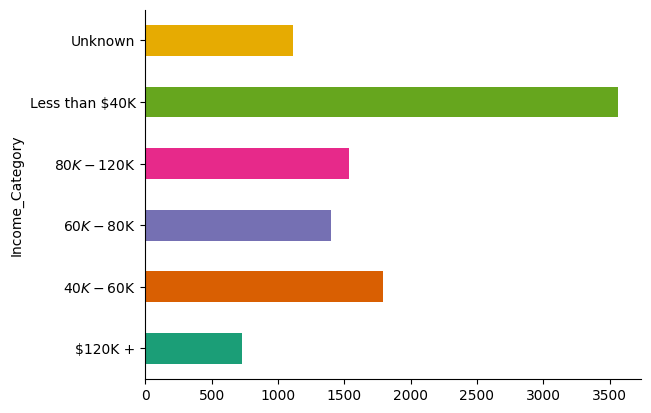

In [ ]:
# @title Income_Category

from matplotlib import pyplot as plt
import seaborn as sns
creditdata.groupby('Income_Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Creation of a new column to show total round-up per month, with 50 centimes as the average rounding.

In [ ]:
creditdata['Roundup_Amt'] = creditdata['Total_Trans_Ct'] * 0.5
print(creditdata.head())


   CLIENTNUM  Customer_Age  Gender  Income_Category  Card_Category  \
0  768805383            45       0             5833              0   
1  818770008            49       1             2500              0   
2  713982108            51       0             8333              0   
3  769911858            40       1             2500              0   
4  709106358            40       0             5833              0   

   Total_Trans_Amt  Total_Trans_Ct  Roundup_Amt  
0             1144              42         21.0  
1             1291              33         16.5  
2             1887              20         10.0  
3             1171              20         10.0  
4              816              28         14.0  


# Creation of a new column showing the total commissions Revolut takes per customer thanks to the round-up.

In [ ]:
creditdata['Comission'] = creditdata['Roundup_Amt'] * 0.0025
print(creditdata.head())

   CLIENTNUM  Customer_Age  Gender  Income_Category  Card_Category  \
0  768805383            45       0             5833              0   
1  818770008            49       1             2500              0   
2  713982108            51       0             8333              0   
3  769911858            40       1             2500              0   
4  709106358            40       0             5833              0   

   Total_Trans_Amt  Total_Trans_Ct  Roundup_Amt  Comission  
0             1144              42         21.0    0.05250  
1             1291              33         16.5    0.04125  
2             1887              20         10.0    0.02500  
3             1171              20         10.0    0.02500  
4              816              28         14.0    0.03500  


In [ ]:
total_comission = creditdata['Comission'].sum()

print("Total Comission:", total_comission)

Total Comission: 821.03


# Regression to identify links between data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming creditdata is your DataFrame and contains the columns 'Income_Category' and 'Total_Trans_Ct'
# If Income_Category is not already numeric, you should convert it or use the mapping we previously discussed.

# Splitting the data into independent (X) and dependent (y) variables
X = creditdata[['Income_Category']]  # X is capitalized because it's a DataFrame
y = creditdata['Total_Trans_Ct']     # y is lowercase because it's a Series

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a LinearRegression instance
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination (R^2): {r2_score(y_test, y_pred)}")


Coefficient: [-0.00039349]
Intercept: 66.50637735936112
Mean squared error: 552.8150400550494
Coefficient of determination (R^2): 0.0012085822605355512


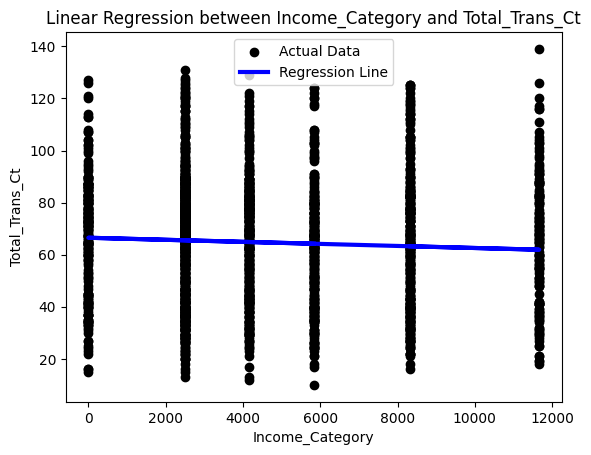

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data points
plt.scatter(X_test, y_test, color='black', label='Actual Data')

# Plotting the regression line
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')

# Adding titles and legends
plt.title('Linear Regression between Income_Category and Total_Trans_Ct')
plt.xlabel('Income_Category')
plt.ylabel('Total_Trans_Ct')
plt.legend()

# Displaying the plot
plt.show()


Coefficient: [116.82585339]
Intercept: -3178.068060637376
Mean squared error: 4075650.3453727453
Coefficient of determination (R^2): 0.6493811295635363


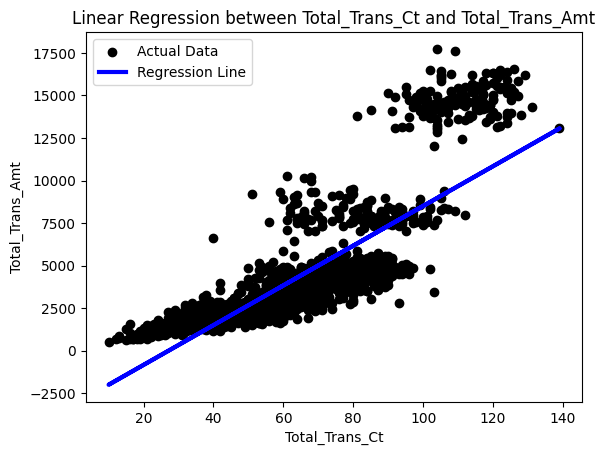

In [ ]:
# Splitting the data into independent (X) and dependent (y) variables
X = creditdata[['Total_Trans_Ct']]  # Independent variable
y = creditdata['Total_Trans_Amt']    # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination (R^2): {r2_score(y_test, y_pred)}")
# Plotting the data points
plt.scatter(X_test, y_test, color='black', label='Actual Data')

# Plotting the regression line
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')

# Adding titles and legends
plt.title('Linear Regression between Total_Trans_Ct and Total_Trans_Amt')
plt.xlabel('Total_Trans_Ct')
plt.ylabel('Total_Trans_Amt')
plt.legend()

# Displaying the plot
plt.show()


Coefficient: [0.01913702]
Intercept: 4296.744044014778
Mean squared error: 11627432.483310323
Coefficient of determination (R^2): -0.00028140245226571103


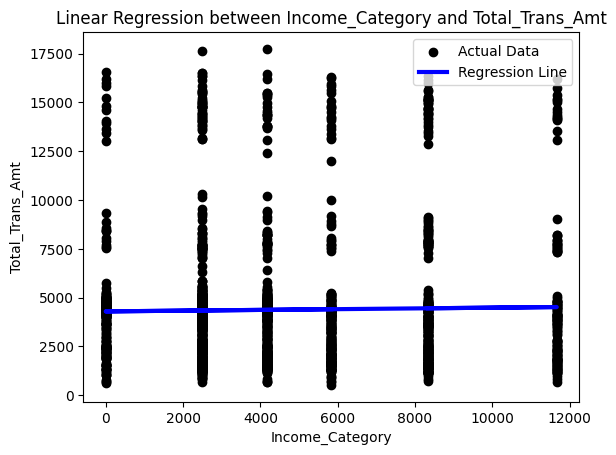

In [ ]:
# Splitting the data into independent (X) and dependent (y) variables
X = creditdata[['Income_Category']]  # Independent variable
y = creditdata['Total_Trans_Amt']    # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination (R^2): {r2_score(y_test, y_pred)}")
# Plotting the data points
plt.scatter(X_test, y_test, color='black', label='Actual Data')

# Plotting the regression line
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')

# Adding titles and legends
plt.title('Linear Regression between Income_Category and Total_Trans_Amt')
plt.xlabel('Income_Category')
plt.ylabel('Total_Trans_Amt')
plt.legend()

# Displaying the plot
plt.show()


the most important regression, as it will enable us to forecast how much money revolut can make based on the number of transactions.

Coefficient: 0.0012500000000000005
Intercept: -4.163336342344337e-17
Mean squared error: 3.3297566266276025e-34
Coefficient of determination (R^2): 1.0


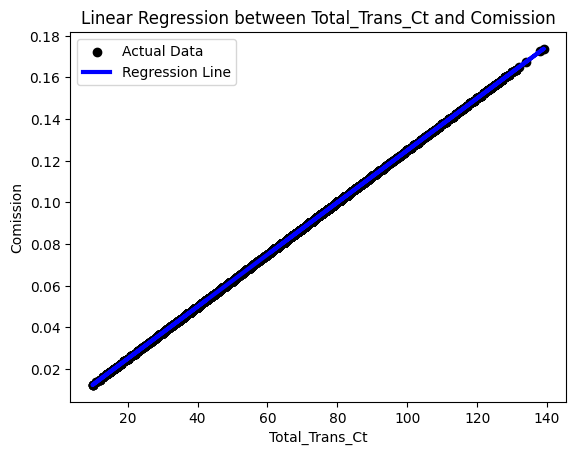

In [ ]:
# Independent variable
X = creditdata[['Total_Trans_Ct']]
# Dependent variable
y = creditdata['Comission']

# Creating and training the model
model = LinearRegression()
model.fit(X, y)

# Making predictions
y_pred = model.predict(X)

# Calculating statistics
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
mse = mean_squared_error(y, y_pred)
print(f"Mean squared error: {mse}")
r2 = r2_score(y, y_pred)
print(f"Coefficient of determination (R^2): {r2}")

# Plotting
plt.scatter(X, y, color='black', label='Actual Data')
plt.plot(X, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.title('Linear Regression between Total_Trans_Ct and Comission')
plt.xlabel('Total_Trans_Ct')
plt.ylabel('Comission')
plt.legend()
plt.show()


In [ ]:
creditdata.to_csv('nouveau_creditdata.csv', index=False)

In [ ]:
from google.colab import files
files.download('nouveau_creditdata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>